In [70]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./imgs/zebra.jpg')

In [71]:

def solve_media_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            media += img[x_in_img + i][y_in_img + j][0] * mask[i][j]
    return round(media / (mask_n**2) , 2)

def solve_mediana_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    arr = []
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            arr.append(img[x_in_img + i][y_in_img + j][0])
    arr.sort()
    pos_middle = (mask_n ** 2) // 2
    return arr[pos_middle]

def solve_min_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    arr = []
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            arr.append(img[x_in_img + i][y_in_img + j][0])
    arr.sort()
    return arr[0]

def solve_max_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    arr = []
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            arr.append(img[x_in_img + i][y_in_img + j][0])
    arr.sort()
    return arr[-1]

def apply_mask(img, mask, func):
    img_result = img.copy()
    h, w, c = img.shape
    offset = mask.shape[0] // 2
    for i in range(h):
        for j in range(w):
            if i < offset or i > h - offset - 1 or j < offset or j > w - offset - 1 :
                for k in range(c):
                    img_result[i][j][k] = 128
                continue    
            val = func(i, j, offset, img, mask)
            #si fuera imagen a color agregar camars BGR
            for k in range(c):
                img_result[i][j][k] = val
    return img_result



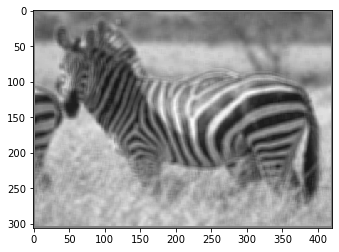

In [72]:
mask = np.ones((7,7,), dtype=int)
img_result = apply_mask(img, mask, solve_media_mask)
plt.imshow(img_result)
plt.show()

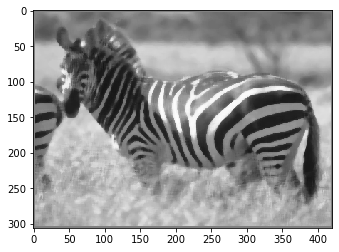

In [73]:
img_result2 = apply_mask(img, mask, solve_mediana_mask)
plt.imshow(img_result2)
plt.show()

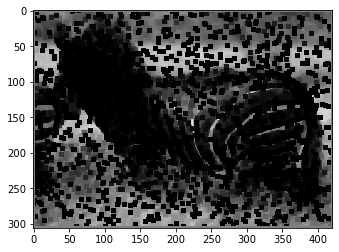

In [74]:
img_result3 = apply_mask(img, mask, solve_min_mask)
plt.imshow(img_result3)
plt.show()

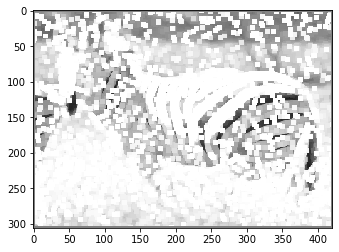

In [75]:
img_result4 = apply_mask(img, mask, solve_max_mask)
plt.imshow(img_result4)
plt.show()